# FC Barcelona Defensive Midfielders Prospects (22-23 Analysis)

In [677]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import mean
from math import pi
import os
from pathlib import Path
from urllib.request import urlopen
from io import BytesIO

In [777]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [429]:
# import general dataset
df = pd.read_csv('Final FBRef 2022-2023.csv')

# define genereal variables
minutes_played = 475 # This is gonna filter out those players that played in both teams (like Oriol Romeu in this case)

# Data Cleansing

In [430]:
# creating selected players dataset

player_pos = "Defensive Midfield"
player_prompt = ["Sergio Busquets", "Martín Zubimendi", "Sofyan Amrabat", "Oriol Romeu"] #, "Hugo Guillamón", "Leandro Paredes", "Joshua Kimmich"] "ARTHUR VERMEEREN"]

df['RecovPer90'] = df['Recov'] / (df['Min']/90)
df['total_cards_received'] = df['Yellows'] + df['Reds'] + df['Yellow2']


#f, axes = plt.subplots(3,4, figsize=(30,10))

df_filt = df[df['Player'].isin(player_prompt)]
df_filt = df_filt[df_filt['Min']>= minutes_played].reset_index(drop=True)

# creating overall dataeset (for all central defensive midfielders in the top 5 leagues)
df_overall = df[df['Main Position'] == player_pos]
df_overall = df_overall[df_overall['Min'] >= minutes_played ].reset_index(drop=True)


In [431]:
''' 
Variables to look for

~ PASSING AND PROGRESSIVE CARRIES 
'Passes CompletedPer90', 'TotCmp%Per90' (Pass accuracy), 'ProgPassDistPer90' (Progressive Passes Distance), 
'xAPer90', 'KeyPassesPer90'

~GOAL/SHOT CREATING ACTIONS
'SCA90' (shot creating actions per 90), 

~DEFENSIVE ATTRIBUTES
'TklPer90' (Tackles), 'TklWinPossPer90' , 'BlocksPer90', 'IntPer90', 'AerialWin%Per90', 

~SOME OTHER INTERESTING METRICS
'CarryMistakesPer90' (miscontrol), 'DisposesedPer90', 'ReceivedPassPer90', 

'''
# add a recoveries per 90 metric
df_filt['RecovPer90'] = df_filt['Recov']/(df_filt['Min']/90)

#list the variables we will use for the analysis
kept_variables = ['Player', 'Squad', 'PassesCompletedPer90', 'TotCmp%Per90', 
                  'ProgPassDistPer90', 'xAPer90',  'KeyPassesPer90', 'SCA90',
                 'TklPer90', 'TklWinPossPer90', 'BlocksPer90', 'IntPer90', 'AerialWin%Per90',
                 'CarryMistakesPer90', 'DisposesedPer90', 'ReceivedPassPer90','RecovPer90','total_cards_received', 'Fls']

# filter based on necessary variables
df_filt = df_filt.loc[:, kept_variables]
df_overall = df_overall.loc[:, kept_variables]

## Possesion and Defensive Skills Graph

In [771]:
colors = ['white', '#66d8ba', '#aa65b2', '#697cd4']

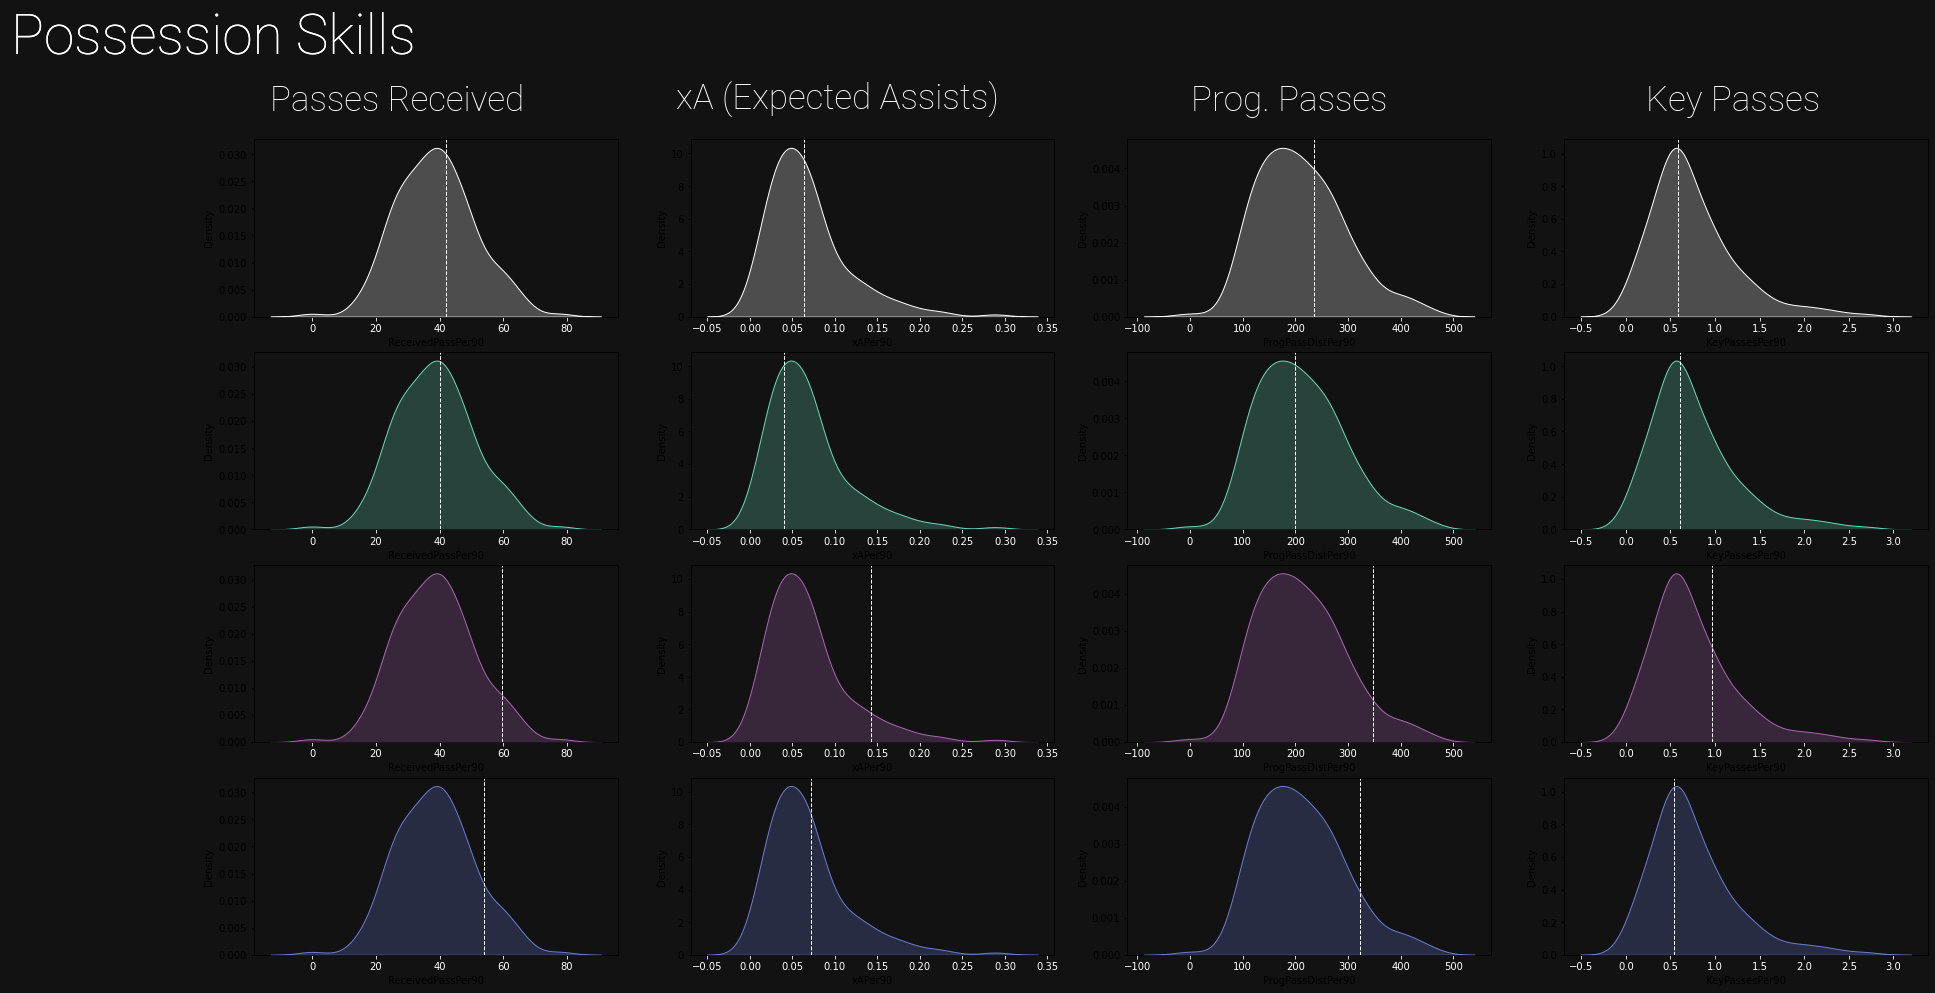

In [772]:
''' POSSESSION GRAPH '''

f, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))


''' ReceivedPassPer90'''
counter = 0

while counter < len(df_filt['ReceivedPassPer90']):
    ax = axes[counter % 4, counter // 4]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['ReceivedPassPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['ReceivedPassPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

''' xA PER 90'''
counter = 0    
while counter < len(df_filt['xAPer90']):
    ax = axes[counter % 4, 1]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['xAPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['xAPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

    
''' ProgPassDistPer90'''
counter = 0    
while counter < len(df_filt['ProgPassDistPer90']):
    ax = axes[counter % 4, 2]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['ProgPassDistPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['ProgPassDistPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
''' KeyPassesPer90'''
counter = 0    
while counter < len(df_filt['KeyPassesPer90']):
    ax = axes[counter % 4, 3]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['KeyPassesPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['KeyPassesPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
''' TEXTS AREA '''

fig_text(
    x = 0.2, y = 0.95, 
    s = "Possession Skills",
    #highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 55, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

'''
fig_text(
    x = 0.2, y = 1.5, 
    s = "Who is the \n<naughtiest> player?",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 20, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  
'''

fig_text(
    x = 0.2, y = 0.95, 
    s = "Possession Skills",
    #highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 55, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 


fig_text(
    x = 0.25, y = 0.9, 
    s = "Passes Received",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  

fig_text(
    x = 0.47, y = 0.9, 
    s = "xA (Expected Assists)",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  

fig_text(
    x = 0.65, y = 0.9, 
    s = "Prog. Passes",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

fig_text(
    x = 0.85, y = 0.9, 
    s = "Key Passes",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

''' PICTURES AREA, we will add the pictures straight to the PDF '''



plt.tight_layout()
plt.savefig('possession_skills.png')
plt.show()



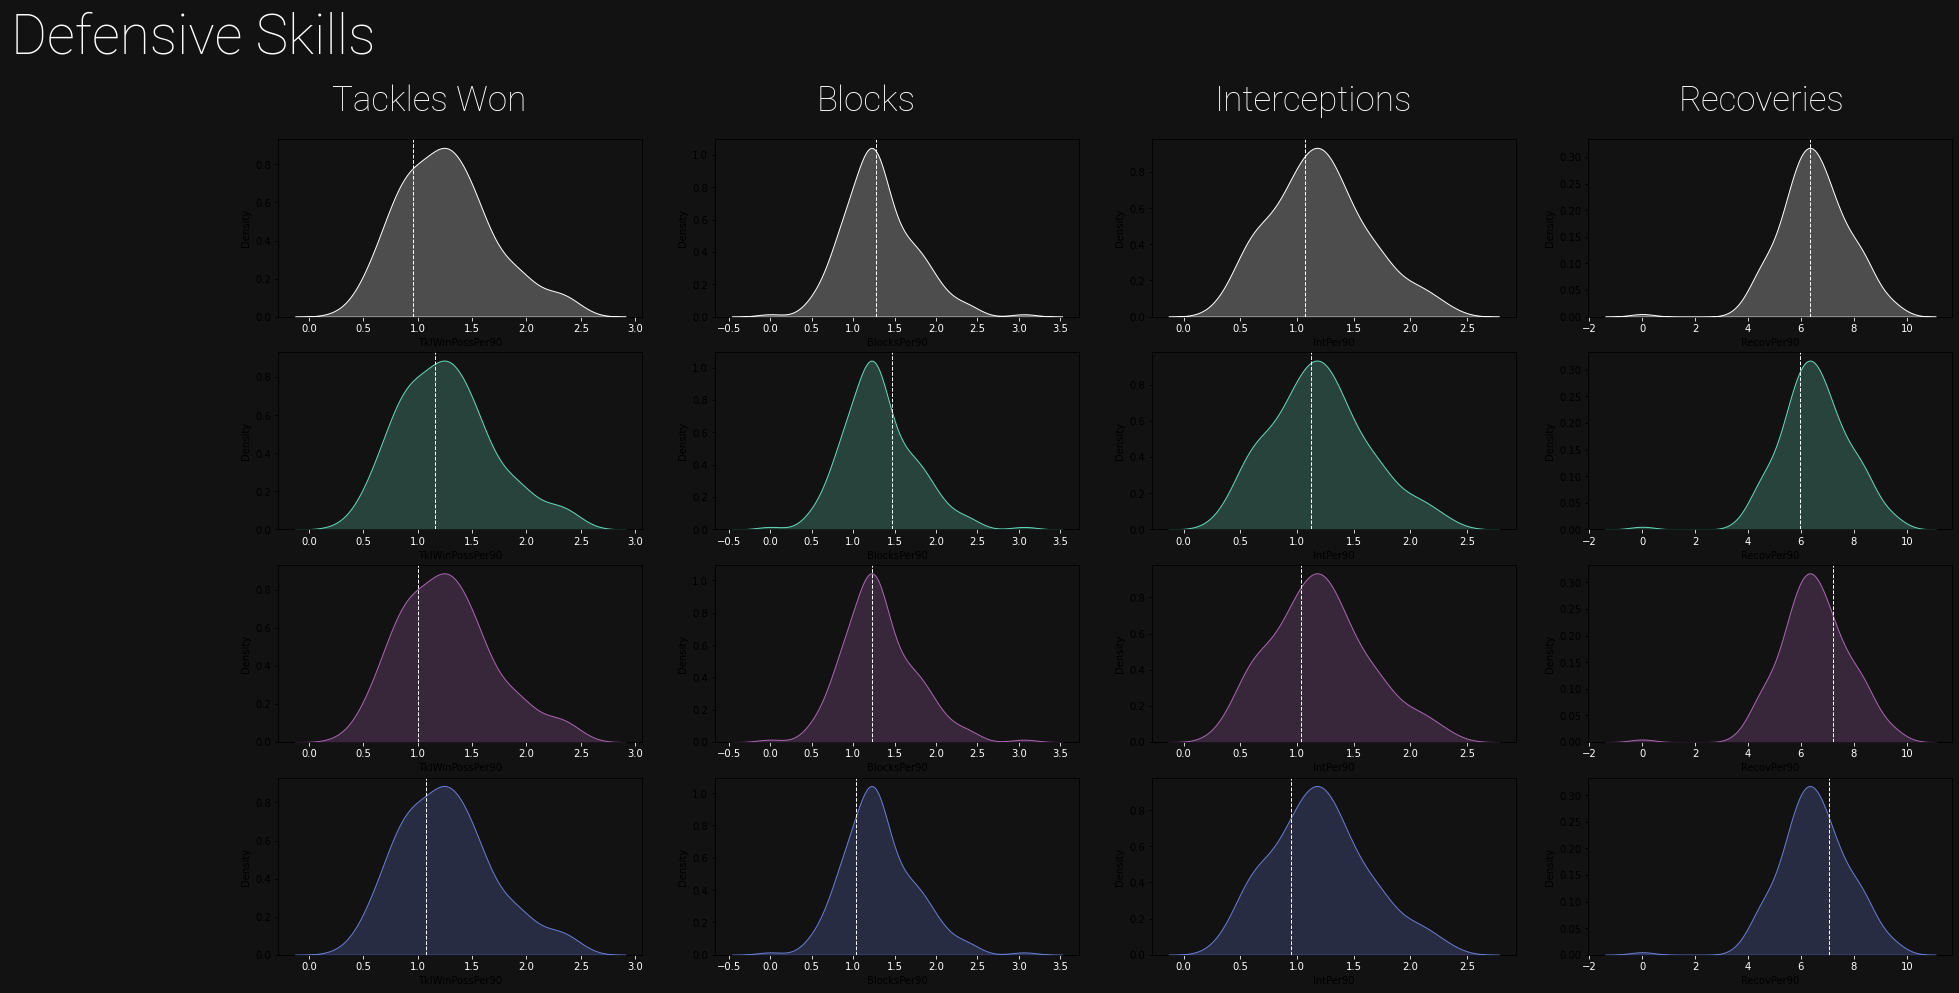

In [775]:
''' DEFENSIVE GRAPH '''

f, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))


'''TklWinPossPer90'''
counter = 0

while counter < len(df_filt['TklWinPossPer90']):
    ax = axes[counter % 4, counter // 4]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['TklWinPossPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['TklWinPossPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

'''BlocksPer90'''
counter = 0    
while counter < len(df_filt['BlocksPer90']):
    ax = axes[counter % 4, 1]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['BlocksPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['BlocksPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1

    
'''IntPer90'''
counter = 0    
while counter < len(df_filt['IntPer90']):
    ax = axes[counter % 4, 2]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['IntPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['IntPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    
'''RecovPer90'''
counter = 0    
while counter < len(df_filt['RecovPer90']):
    ax = axes[counter % 4, 3]  # Calculate row and column indices
    
    ax.set_facecolor('#121212')  # change background color of axes
    f.set_facecolor('#121212')   # change figure background color

    # set the title ~ WE'LL EDIT THE TITLES IN THE PDF ITSELF
    title = ' ' #f'Received Pass per 90 - {df_filt["Player"][counter]}'
    plt.figtext(0.48, 0.91, title, ha='center', fontsize=16, color='white')
    
    

    sns.kdeplot(df_overall['RecovPer90'], color=colors[counter], fill=True, ax=ax)
    ax.axvline(df_filt['RecovPer90'][counter].sum(), color='white', linestyle='dashed', linewidth=1)

    # change axis color to white so we can see it
    ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')

    counter += 1
    

''' TEXTS AREA '''    
    
fig_text(
    x = 0.17, y = 0.95, 
    s = "Defensive Skills",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 55, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)   

fig_text(
    x = 0.24, y = 0.9, 
    s = "Tackles Won",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  

fig_text(
    x = 0.42, y = 0.9, 
    s = "Blocks",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  

fig_text(
    x = 0.65, y = 0.9, 
    s = "Interceptions",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

fig_text(
    x = 0.85, y = 0.9, 
    s = "Recoveries",
    # highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 35, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 


plt.tight_layout()
plt.savefig('defensive_skills.png')
plt.show()


# Radar Graph

In [385]:
df_filt.columns

Index(['Player', 'Squad', 'PassesCompletedPer90', 'TotCmp%Per90',
       'ProgPassDistPer90', 'xAPer90', 'KeyPassesPer90', 'SCA90', 'TklPer90',
       'TklWinPossPer90', 'BlocksPer90', 'IntPer90', 'AerialWin%Per90',
       'CarryMistakesPer90', 'DisposesedPer90', 'ReceivedPassPer90',
       'RecovPer90'],
      dtype='object')

In [387]:
from mplsoccer import Radar, FontManager, grid

# https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html

params = ['PassesCompletedPer90', 'TotCmp%Per90', 'ProgPassDistPer90', 'xAPer90',
              'KeyPassesPer90', 'SCA90', 'TklPer90', 'TklWinPossPer90', 'BlocksPer90', 'IntPer90']

# the lower and upper boundaries for the statistics ~ MAYBE CHANGE THIS TO ALLOW SPACING IN THE RADAR
#-10, -0.5
#+10, +0.5
#
'''
low = [df_filt['PassesCompletedPer90'].min(),
       df_filt['TotCmp%Per90'].min(),
       df_filt['ProgPassDistPer90'].min(),
       df_filt['xAPer90'].min(),
       df_filt['KeyPassesPer90'].min(),
       df_filt['SCA90'].min(),
       df_filt['TklPer90'].min(),
       df_filt['TklWinPossPer90'].min()]
'''
low = [df_overall['PassesCompletedPer90'].quantile(0.25),
       df_overall['TotCmp%Per90'].quantile(0.25),
       df_overall['ProgPassDistPer90'].quantile(0.25),
       df_overall['xAPer90'].quantile(0.25),
       df_overall['KeyPassesPer90'].quantile(0.25),
       df_overall['SCA90'].quantile(0.25),
       df_overall['TklPer90'].quantile(0.25),
       df_overall['TklWinPossPer90'].quantile(0.25),
       df_overall['BlocksPer90'].quantile(0.25),
       df_overall['IntPer90'].quantile(0.25)
      ]
'''
high = [df_filt['PassesCompletedPer90'].max(), 
        df_filt['TotCmp%Per90'].max(),
        df_filt['ProgPassDistPer90'].max(),
        df_filt['xAPer90'].max(),
        df_filt['KeyPassesPer90'].max(),
        df_filt['SCA90'].max(),
        df_filt['TklPer90'].max(),
        df_filt['TklWinPossPer90'].max()]
'''
high = [df_overall['PassesCompletedPer90'].quantile(0.75), 
        df_overall['TotCmp%Per90'].quantile(0.75),
        df_overall['ProgPassDistPer90'].quantile(0.75),
        df_overall['xAPer90'].quantile(0.75),
        df_overall['KeyPassesPer90'].quantile(0.75),
        df_overall['SCA90'].quantile(0.75),
        df_overall['TklPer90'].quantile(0.75),
        df_overall['TklWinPossPer90'].quantile(0.75),
        df_overall['BlocksPer90'].quantile(0.75),
        df_overall['IntPer90'].quantile(0.75)
       ]




radar = Radar(params, low, high,
              round_int=[False]*len(params),
              num_rings = 4, # number of concentric circles
              ring_width = 1, center_circle_radius=1)

In [388]:
# storing values on lists
zubimendi_values = df_filt.loc[0, params].to_list()
romeu_values = df_filt.loc[1, params].to_list()
busquets_values = df_filt.loc[2, params].to_list()
amrabat_values = df_filt.loc[3, params].to_list()


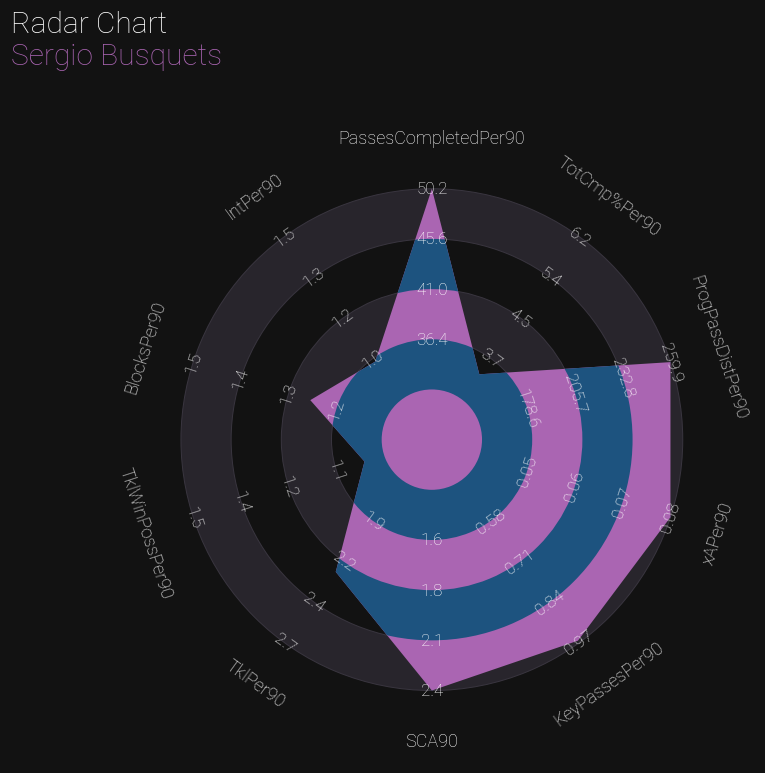

In [567]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(busquets_values, ax=ax, 
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

fig_text(
    x = 0.27, y = 0.93, 
    s = "Radar Chart \n<Sergio Busquets>",
    highlight_textprops=[{"color":"#aa65b2", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 30, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)   

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.savefig('busquets_radar.png')

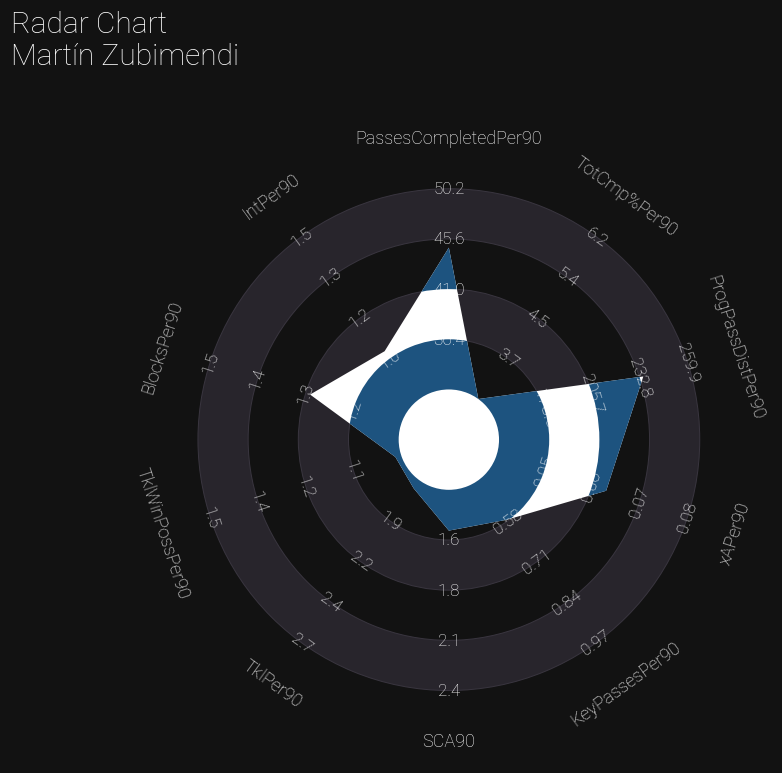

In [566]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(zubimendi_values, ax=ax, 
                                kwargs_radar={'facecolor': 'white'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)
fig_text(
    x = 0.27, y = 0.93, 
    s = "Radar Chart \n<Martín Zubimendi>",
    highlight_textprops=[{"color":"white", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 30, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)  

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.savefig('zubimendi_radar.png')

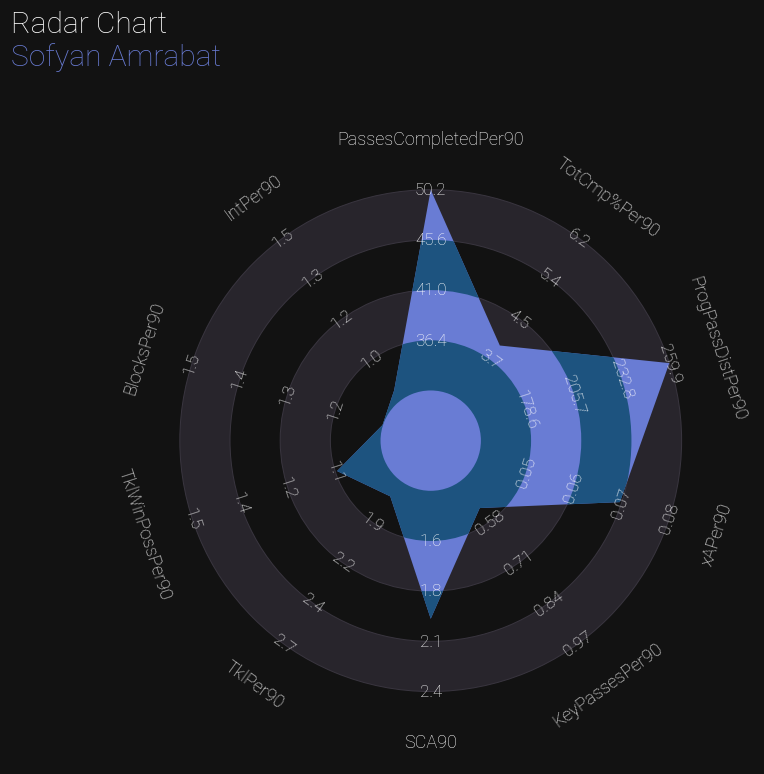

In [565]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(amrabat_values, ax=ax, 
                                kwargs_radar={'facecolor': '#697cd4'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)
fig_text(
    x = 0.27, y = 0.93, 
    s = "Radar Chart \n<Sofyan Amrabat>",
    highlight_textprops=[{"color":"#697cd4", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 30, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.savefig('amrabat_radar.png')

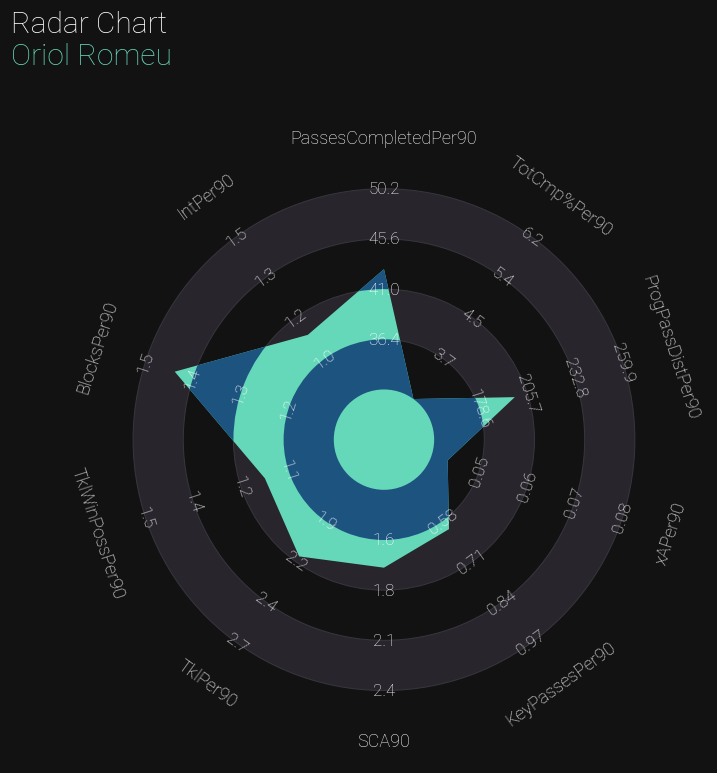

In [564]:
fig,ax = radar.setup_axis()

rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f') # drawing the circles
radar_output = radar.draw_radar(romeu_values, ax=ax, 
                                kwargs_radar={'facecolor': '#66d8ba'},
                                kwargs_rings={'facecolor': '#1d537f'})
#radar_poly, ring_outer_vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=17, color='white', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)  # draw the param labels

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)
fig_text(
    x = 0.27, y = 0.93, 
    s = "Radar Chart \n<Oriol Romeu>",
    highlight_textprops=[{"color":"#66d8ba", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 30, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.savefig('romeu_radar.png')

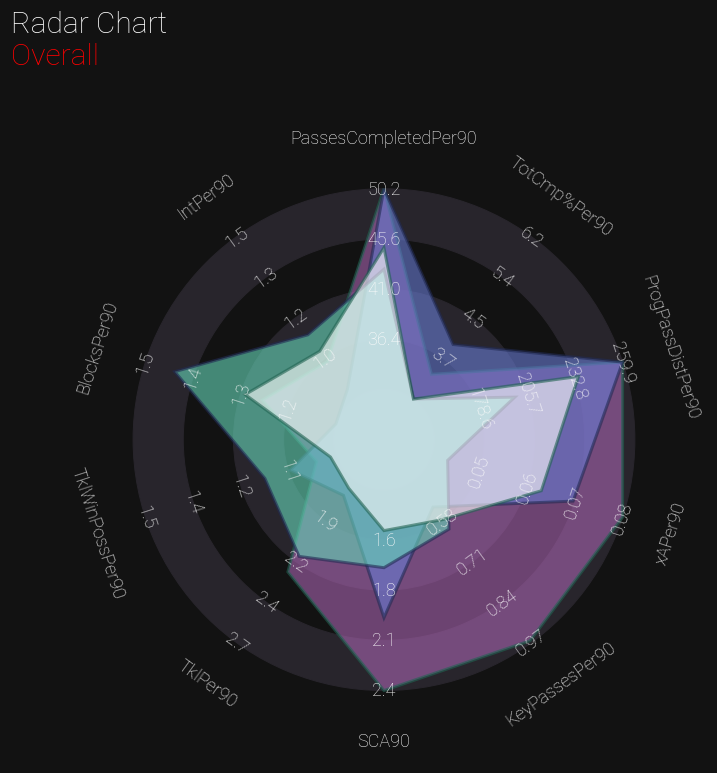

In [563]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#28252c')

radar1, vertices1 = radar.draw_radar_solid(busquets_values, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})



radar3, vertices3 = radar.draw_radar_solid(amrabat_values, ax=ax,
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

radar4, vertices4 = radar.draw_radar_solid(romeu_values, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(zubimendi_values, ax=ax,
                                           kwargs={'facecolor': 'white',#C4B454
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})
                                                   
range_labels = radar.draw_range_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)

#lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)
fig_text(
    x = 0.27, y = 0.93, 
    s = "Radar Chart \n<Overall>",
    highlight_textprops=[{"color":"red", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 30, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
) 

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.savefig('overall_radar.png')

## Naughtiest Players
#### Inspiration -> https://www.sonofacorner.com/the-premier-leagues-naughty-boys/

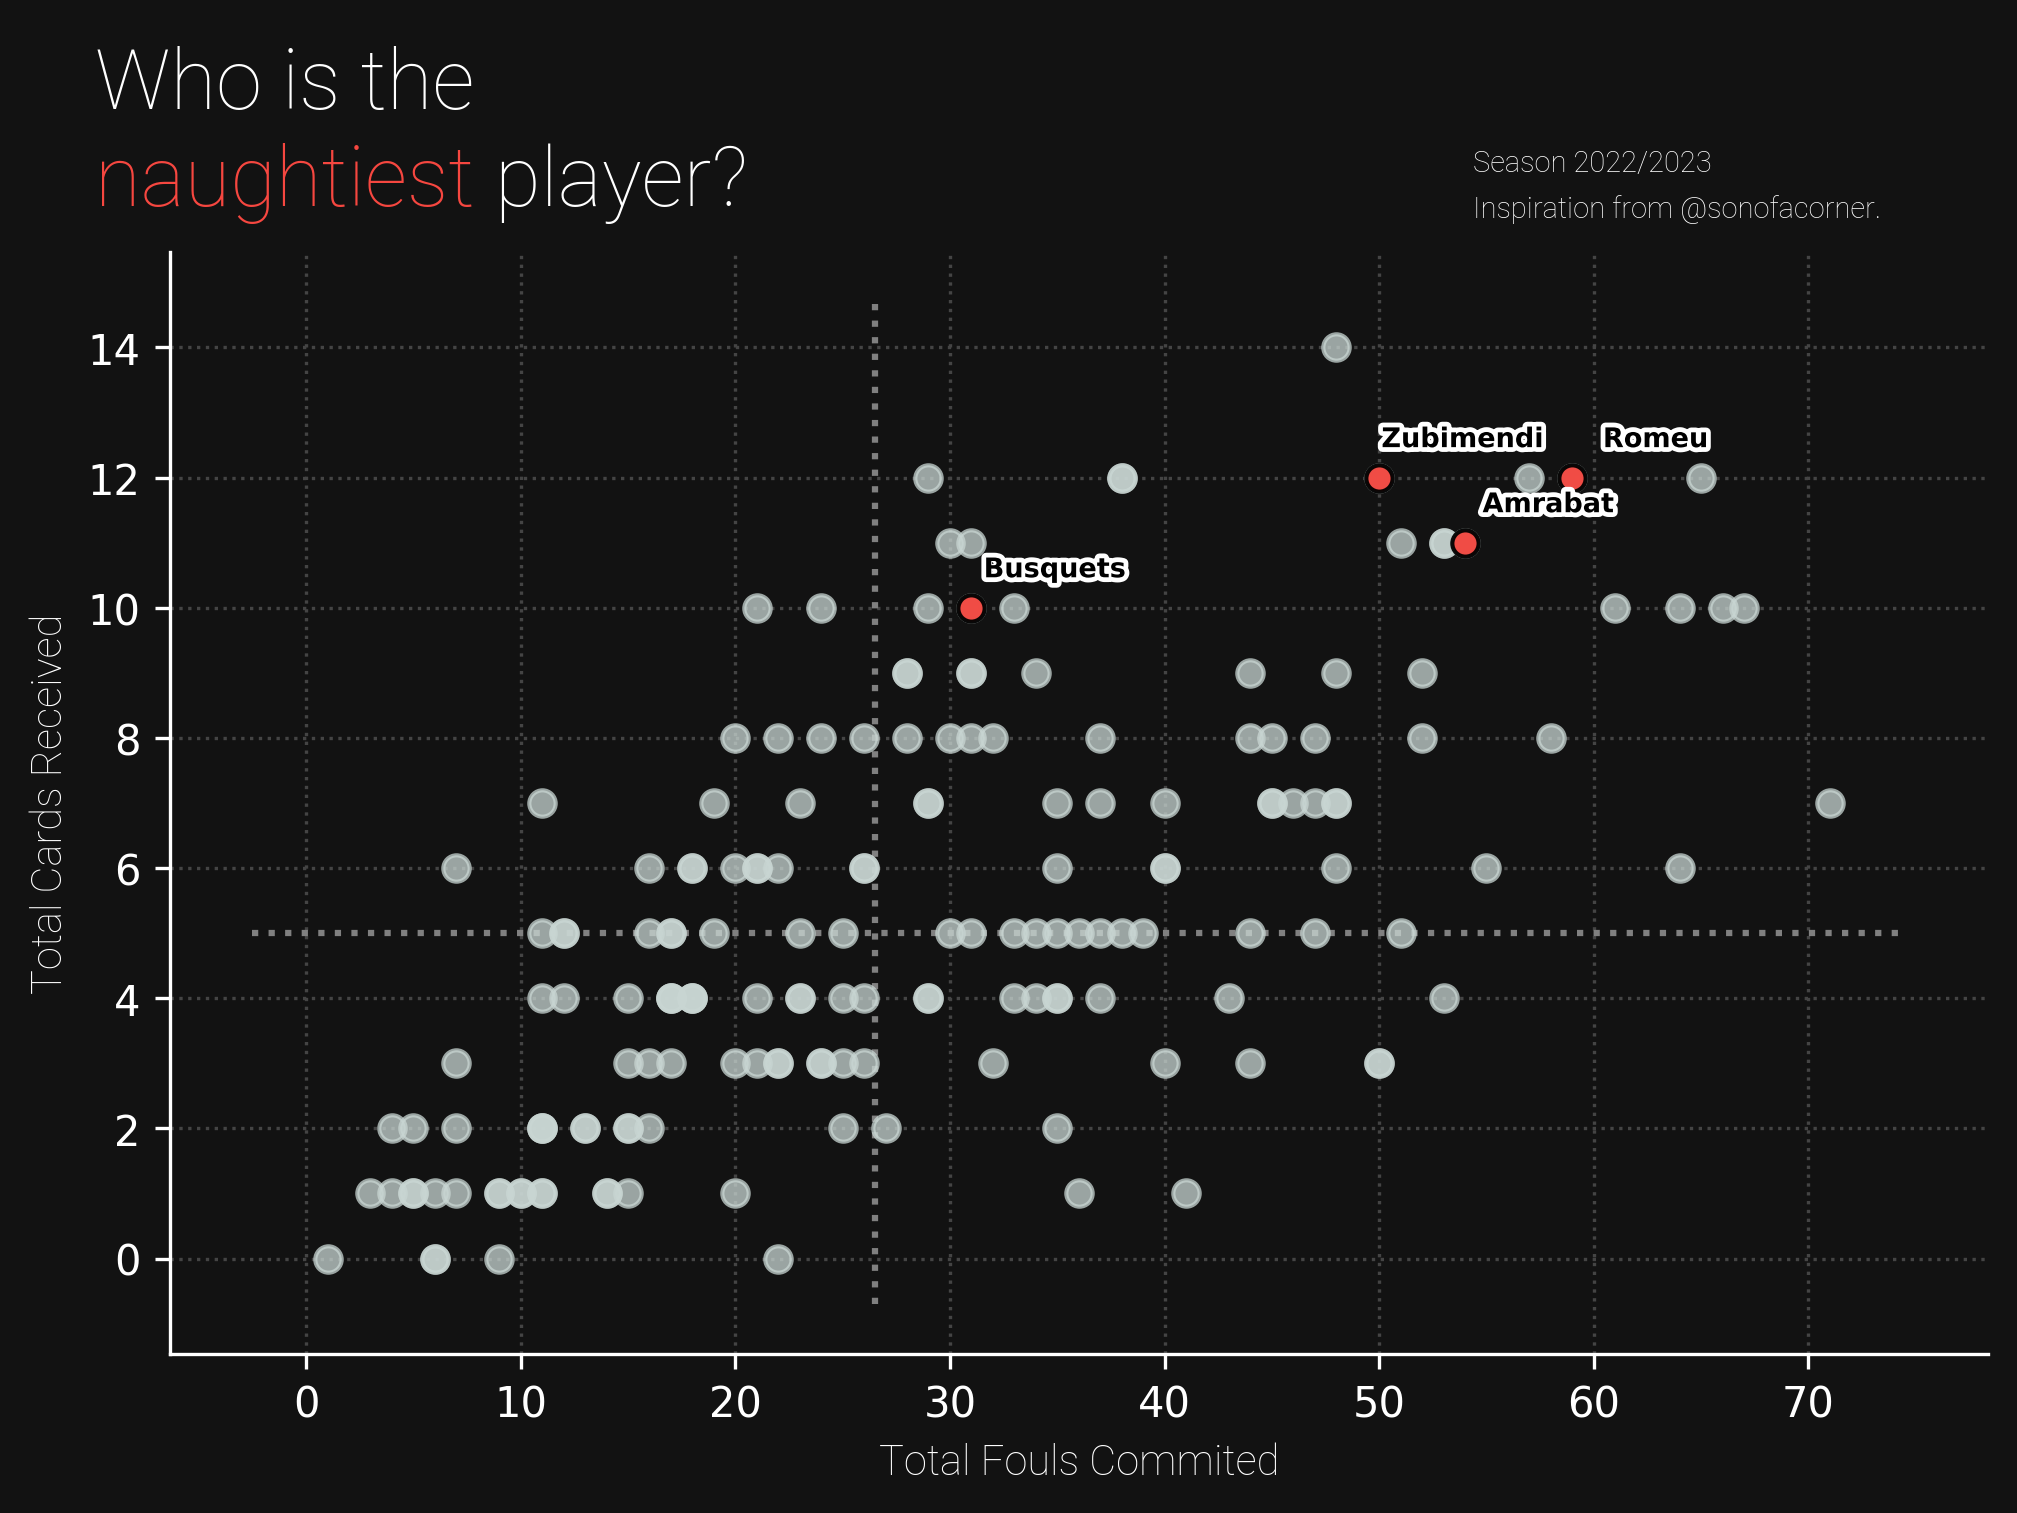

In [773]:
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text

# we first need to cleanse the data again a bit

fig = plt.figure(figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#EFE9E6")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


variable_1 = 'Fls'
variable_2 = 'total_cards_received'


''' DRAWING DATA POINT VALUES '''
# First we'll plot the scatter with all the defensive midfield values
ax.scatter(
    df_overall[variable_1],
    df_overall[variable_2],
    s = 40,
    alpha = 0.75,
    color = '#c9d6d3',
    zorder = 3    
    
)

ax.scatter(
    df_filt[variable_1],
    df_filt[variable_2],
    s = 40,
    alpha = 0.95,
    color = '#F64740',
    zorder = 3 ,
    ec = '#000000'
    
)

''' DRAWING GRIDLINES BASED ON MEDIAN VALUES '''

ax.plot(
    [df_overall[variable_1].median(), df_overall[variable_1].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [df_overall[variable_2].median(), df_overall[variable_2].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", color = "#444444")

''' FOR LOOP FOR LABELING '''

for index, name in enumerate(df_filt['Player']):
    X = df_filt[variable_1].iloc[index]
    Y = df_filt[variable_2].iloc[index]
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(' ')[1],
        ha = 'center',
        va = 'center',
        xytext = (20, 9),
        textcoords = 'offset points',
        weight = 'bold',
        fontsize = 6.5,
        #fontproperties=robotto_thin.prop
    )
    
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.3, foreground="white"), 
                path_effects.Normal()]
            )
  

# add labels for axes
ax.set_xlabel("Total Fouls Commited", color='white', fontsize = 10, fontproperties=robotto_thin.prop)
ax.set_ylabel("Total Cards Received", color='white', fontsize = 10, fontproperties=robotto_thin.prop)

# change color of axis' label-values
ax.tick_params(axis='x', colors='white') 
ax.tick_params(axis='y', colors='white') 

# change color of spines (lines in the axis)
ax.spines["bottom"].set_color("white")  # Change x-axis color to white
ax.spines["left"].set_color("white")    # Change y-axis color to white


fig_text(
    x = 0.37, y = 0.87, 
    s = "Who is the \n<naughtiest> player?",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 20, color = "white", weight = "bold", fontproperties=robotto_thin.prop #font = "Karla"
)    

fig_text(
    x = 0.91, y = .87, 
    s = "Season 2022/2023\nInspiration from @sonofacorner.",
    va = "bottom", ha = "right",
    fontsize = 7, color = "white", fontproperties=robotto_thin.prop #font = "Karla"
)

ax.set_facecolor('#121212')
fig.set_facecolor('#121212')
plt.tight_layout()
plt.savefig('naughty.png')

# PDF Section

In [687]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics
from PIL import Image
import pandas as pd
import urllib

In [776]:
c = canvas.Canvas('CDM_Barca_Prospects_Analysis.pdf', pagesize=letter)

''' BACKGROUND COLOR '''
c.setFillColorRGB(0.071, 0.071, 0.071)  
c.rect(0, 0, 630, 810, fill=True)

''' BARCA LOGO '''
#c.drawImage('barcalogo.png', 140, 585, width=150, height=150)
c.drawImage('barcalogo.png', 196, 645, width=140, height=140)

''' VIZZES '''
c.drawImage('possession_skills.png', 10, 450, width=615, height=195) 
c.drawImage('defensive_skills.png', 10, 255, width=615, height=195) 

c.drawImage('zubimendi_radar.png', 10, 125, width=160, height=130) 
c.drawImage('romeu_radar.png', 10, -5, width=160, height=130) 

c.drawImage('busquets_radar.png', 170, 125, width=160, height=130) 
c.drawImage('amrabat_radar.png', 170, -5, width=160, height=130) 

c.drawImage('overall_radar.png', 340, 2, width=260, height=250) 

c.drawImage('naughty.png', 345, 648, width=270, height=140) 

''' PICTURES '''
c.drawImage('zubimendi.png', 30, 590, width=33, height=33) 
c.drawImage('romeu.png', 30, 550, width=33, height=33) 
c.drawImage('busquets.png', 28, 510, width=35, height=36)     
c.drawImage('amrabat.png', 30, 473, width=33, height=33) 


c.drawImage('zubimendi.png', 30, 393, width=33, height=33) 
c.drawImage('romeu.png', 30, 353, width=33, height=33) 
c.drawImage('busquets.png', 28, 313, width=35, height=36)     
c.drawImage('amrabat.png', 30, 276, width=33, height=33) 

''' TEXT-TITLE '''
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
font_data = BytesIO(urlopen(URL4).read())
pdfmetrics.registerFont(TTFont('RobotoThin', font_data))

# Add a title with specified font and size
c.setFont('RobotoThin', 25)
c.setFillColorRGB(1, 1, 1)  # Set text color to white
title = "Replacing"
c.drawString(10, 770, title)

c.setFont('RobotoThin', 23)
#c.setFillColorRGB(1,1,1)  # Set text color to white
c.setFillColor('#aa65b2')
title = "Sergio Busquets"
c.drawString(10, 740, title)

c.setFont('RobotoThin', 9)
c.setFillColorRGB(1, 1, 1)  # Set text color to white
title = "A descriptive statistics analysis & visualization on"
c.drawString(10, 700, title)

c.setFont('RobotoThin', 9)
c.setFillColorRGB(1, 1, 1)  # Set text color to white
title = "FC Barcelona CDM Prospects for the 23/24 season"
c.drawString(10, 687, title)

c.setFont('RobotoThin', 9)
c.setFillColorRGB(1, 1, 1)  # Set text color to white
title = "based on 22/23 data provided by FBRef via Opta"
c.drawString(10, 674, title)

''' WATER MARK '''
c.setFont('RobotoThin', 8)
c.setFillColorRGB(0.7, 0.7, 0.7)
text = 'by @EnzoVillafuerte'
c.drawString(133, 660, text)

# Save and close the PDF file
c.save()